### <ins>Time Series Analysis</ins>

##### ARIMA

In [4]:
# from arch.unitroot import ADF 
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [25]:
# Import Libraries

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch.unitroot import ADF 
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.stats.diagnostic import acorr_ljungbox


import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 5 Time Series Analysis\04 Live Data Sets")

In [5]:
# Read in the data
cropdata = pd.read_csv("CROP DATA.csv")
print("✅ Dataset Loaded Successfully")
print(cropdata.head())

✅ Dataset Loaded Successfully
   Year  Quarter  CROPYIELD
0  1947        1   2182.681
1  1947        2   2176.892
2  1947        3   2172.432
3  1947        4   2206.452
4  1948        1   2239.682


In [6]:
print(cropdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       308 non-null    int64  
 1   Quarter    308 non-null    int64  
 2   CROPYIELD  308 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.3 KB
None


In [7]:
# Create a Time Series Object
cropdata_yearly = cropdata.groupby('Year')['CROPYIELD'].sum().reset_index()
cropdata_yearly.head()

,Year,CROPYIELD
0,1947,8738.457
1,1948,9098.506
2,1949,9047.711
3,1950,9834.127
4,1951,10625.280


In [12]:
rng = pd.date_range('1947','2024',freq='Y') #end = 2024 has to be +1 year since it is exclusive
s = cropdata_yearly.CROPYIELD.values
yieldseries = pd.Series(s, rng)
print("Yield Series: \n", yieldseries)

Yield Series: 
 1947-12-31     8738.457
1948-12-31     9098.506
1949-12-31     9047.711
1950-12-31     9834.127
1951-12-31    10625.280
                ...    
2019-12-31    82768.347
2020-12-31    80936.296
2021-12-31    85630.770
2022-12-31    87288.146
2023-12-31    89497.357
Freq: YE-DEC, Length: 77, dtype: float64


<Axes: title={'center': 'Crop Yield Over Time'}>

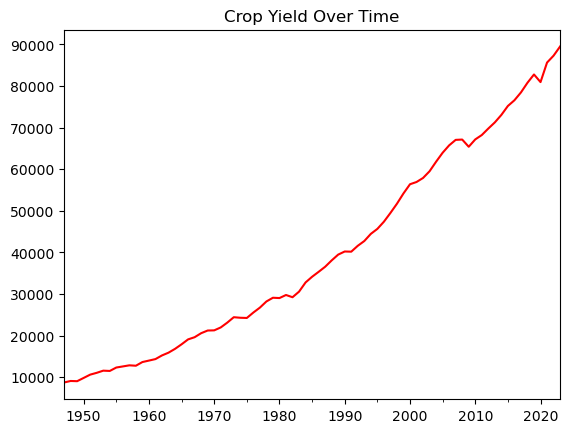

In [13]:
# Plot the Time Series

yieldseries.plot(color='red', title ="Crop Yield Over Time")

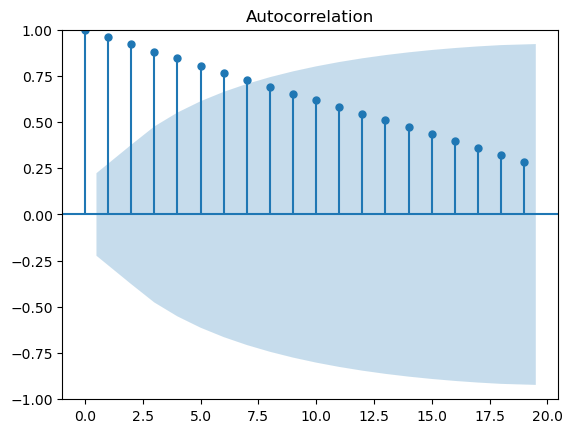

In [14]:
# Correlogram

plot_acf(yieldseries)
plt.show()

Inference:
We can see a very slow decay. Hence, it’s a sign of non-stationary

### Dickey Fuller Test

In [15]:
adf = ADF(yieldseries,lags=0,trend='n')
adf.summary()

Test Statistic,10.991
P-value,1.000
Lags,0


In [26]:
diffs = ndiffs(yieldseries)
print("Number of differences needed:", diffs)

Number of differences needed: 2


<Axes: >

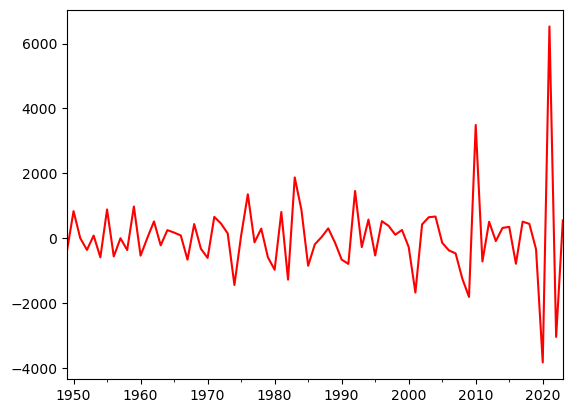

In [17]:
yielddiff = diff(yieldseries)
yielddiff2 = diff(yielddiff)
yielddiff2.plot(color='red')

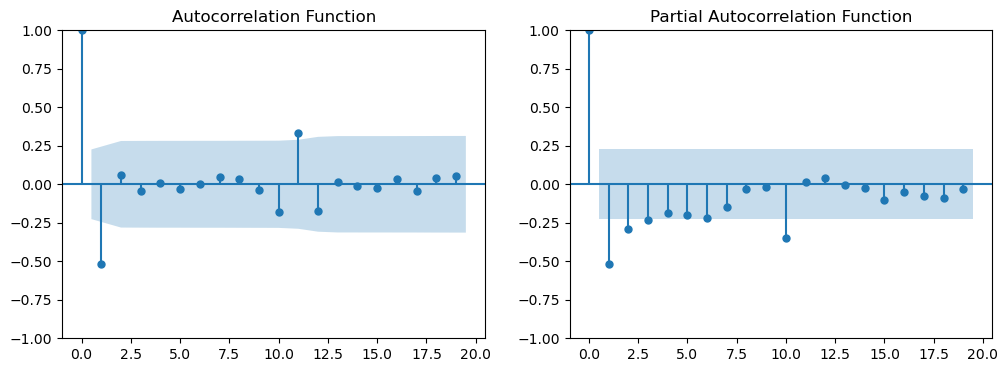

In [22]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(yielddiff2, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# PACF plot
plot_pacf(yielddiff2, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.show()

In [23]:
adf = ADF(yielddiff2,lags=0,trend='n')
adf.summary()

Test Statistic,-15.226
P-value,0.000
Lags,0


#### Step Two and Three: Model Identification and Parameter Estimation

###### ARIMA Model

Although, Indicative Statistical Model is (1,2,1), we will be considering p=2 and q=2 for auto.arima

In [27]:
model = pm.auto_arima(yieldseries, max_p=2, max_q=2, d=2, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1283.929, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1267.411, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1281.960, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1261.666, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1259.699, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1265.363, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1247.884, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1245.917, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1244.431, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1245.903, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1248.282, T

In [28]:
model.params()

ma.L1         -0.898574
sigma2    822606.224654
dtype: float64

In [29]:
model.aic()

1244.4313001286037

Diagnostic Checking

In [30]:
resi = pd.Series(model.resid(),rng)
acorr_ljungbox(resi, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1.952447,0.162323,1.878303,0.170527
2,2.544453,0.280207,2.440334,0.295181
3,2.661401,0.446827,2.549881,0.466344
4,2.666522,0.615085,2.554613,0.634884
5,2.748128,0.738748,2.628988,0.756956
6,2.749660,0.839547,2.630365,0.853602
7,2.796396,0.903177,2.671776,0.913617
8,2.892010,0.940950,2.755287,0.948764
9,3.064983,0.961663,2.904175,0.967973
10,3.319378,0.972878,3.119928,0.978459


<Axes: >

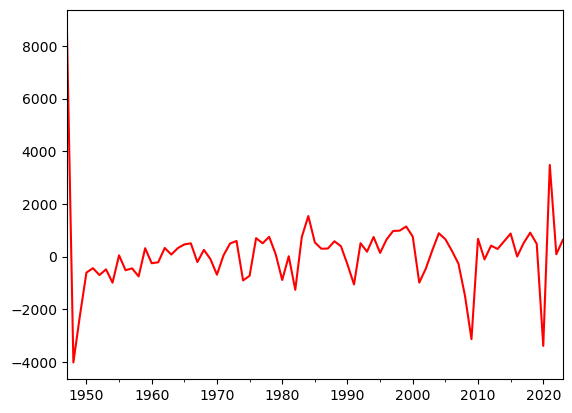

In [31]:
resi.plot(color = 'red')

Since the p value > 0.05, the errors are assumed to be white noise

## Forecasting

Horizon = Prediction period

In [32]:
model.predict(1)
model.predict(2)
model.predict(3)

2024-12-31    91138.301869
2025-12-31    92779.246737
2026-12-31    94420.191606
Freq: YE-DEC, dtype: float64